In [1]:
import sys
# sys.path
# sys.path[5] = "C:\\ProgramData\\Anaconda3\\envs\\geoplot\\Lib\\site-packages"

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from osgeo import gdal
import pandas as pd
from shapely.geometry import Point
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

# import rasterio
#PlateCarree EqualEarth()

In [2]:
def get_geotiff_data(path):
    """
    get gdal raster data
    """
    ds = gdal.Open(path)
    gt = ds.GetGeoTransform()
    array = ds.ReadAsArray()
    array = array[:600, :]
    
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    
    xres, yres = gt[1], gt[5]
    xcor, ycor = gt[0], gt[3]
    
    lat = np.arange(ycor, ycor + yres*ysize, yres)[:600]
    lon = np.arange(xcor, xcor + xres*xsize, xres)
    return lon, lat, array

In [3]:
def draw(ax1, title, lon, lat, array, vmin, vmax, levels, cmap, number):
    ax1.outline_patch.set_linewidth(0.3)
    #设置颜色属性
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    # array[array==-9999] = np.nan
    # cs = ax1.contourf(lon+0.125, lat-0.125, array, transform=ccrs.PlateCarree(), cmap=cmap,levels=levels, norm=norm, shading='nearest', extend="max")
    # cbar = fig.colorbar(cs, orientation='horizontal', pad=0.09, shrink=1, fraction=0.03, aspect=50)
    # # ax1.set_title(title, fontsize='medium')
    # #修改刻度线长短
    # cbar.ax.tick_params(size=1)
    # cbar.outline.set_linewidth(0.2)
    # ax1.add_feature(cfeature.BORDERS, linewidth=0.15)
    # ax1.set_global()
    ax1.add_feature(cfeature.LAND.with_scale('110m'))
    ax1.coastlines(linewidth=0.2)

    # a = ax1.gridlines(draw_labels=True, linewidth=0.2)
    ax1.set_extent([-179.9999, 179.9999, -60, 90],ccrs.PlateCarree())
    # ax1.set_ylim(-60, 90)
    # a.top_labels = False
    # fix_extent(ax1, (-180, 180, -60, 90))

In [4]:
def draw_hist(ax, array, bins, ran):

    N, bins, patches = ax.hist(array, bins=bins, range=ran, color="gray", edgecolor='black', density=False, linewidth=0.2)
    
    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([]) 
    
    # ax.set_xticks([0, 0.25, 0.5, 0.75, 1], ["100%", "population", "Equal", "Probability", "100%"], rotation=90, fontsize=4)
    ax.set_facecolor("none")
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    # ax.spines['left'].set_visible(False)
    ax.spines["bottom"].set_linewidth("0.5")
    ax.spines["left"].set_linewidth("0.5")
    ax.margins(0, 0)
    ax.tick_params("x",which="major",
               length=2,width = 0.2,
               colors = "0.25")

    
    
    ax.tick_params("y",which="major",
               length=2,width = 0.2,
               colors = "0.25")
    
    # formatter = ticker.FormatStrFormatter("%1.2f")
    # ax.yaxis.set_major_formatter(formatter)
    
    ax.tick_params("x",which="major",
               length=1.34,width = 0.8,
               colors = "0.25", pad=-0.01, labelsize=5)
    ax.tick_params("y",which="major",
                   length=1.34,width = 0.8,
                   colors = "0.25", pad=-0.01, labelsize=5)
    ax.set_xlabel("Data length (year)")
    ax.set_ylabel("Number of site")

In [5]:
def draw_vectors(ax, df, crs):
    geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
    df["geometry"] = geometry
    gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
    gdf = gdf.to_crs(crs)
    for i in range(len(gdf)):
        gdf.loc[i, "time_length"] = int(df.loc[i, "Period"].split("-")[1]) - int(df.loc[i, "Period"].split("-")[0])+1

        if gdf.loc[i, "time_length"] <= 5:
            gdf.loc[i, "time_sizes"] = 15
        if 6 <= gdf.loc[i, "time_length"] <= 10:
            gdf.loc[i, "time_sizes"] = 20
        if 11 <= gdf.loc[i, "time_length"] <= 15:
            gdf.loc[i, "time_sizes"] = 25
        if 16 <= gdf.loc[i, "time_length"] <= 20:
            gdf.loc[i, "time_sizes"] = 30
        if gdf.loc[i, "time_length"] >= 21:
            gdf.loc[i, "time_sizes"] = 35
        
        if gdf.loc[i, "PFT"] == "EBF":
            gdf.loc[i, "colors"] = "#076A10"
        elif gdf.loc[i, "PFT"] == "DBF":
            gdf.loc[i, "colors"] = "#78D103"
        elif gdf.loc[i, "PFT"] == "MF":
            gdf.loc[i, "colors"] = "#009900"
        elif gdf.loc[i, "PFT"] == "ENF":
            gdf.loc[i, "colors"] = "#076A10"
        elif gdf.loc[i, "PFT"] == "WSA":
            gdf.loc[i, "colors"] = "#DADE49"
        elif gdf.loc[i, "PFT"] == "CSH":
            gdf.loc[i, "colors"] = "#C6B043"
        elif gdf.loc[i, "PFT"] == "OSH":
            gdf.loc[i, "colors"] = "#DCD259"
        elif gdf.loc[i, "PFT"] == "GRA":
            gdf.loc[i, "colors"] = "#B7FF06"
        elif gdf.loc[i, "PFT"] == "CRO":
            gdf.loc[i, "colors"] = "#C34E44"
        elif gdf.loc[i, "PFT"] == "WET":
            gdf.loc[i, "colors"] = "#28FF86"
        elif gdf.loc[i, "PFT"] == "SNO":
            gdf.loc[i, "colors"] = "#69FEFA"
        elif gdf.loc[i, "PFT"] == "SAV":
            gdf.loc[i, "colors"] = "#FBFF14"
        

    ax.scatter(x = gdf["geometry"].x,
           y = gdf["geometry"].y,
           s = 1,
            c="k",
           alpha = 1,
           transform=crs
            )

    ax.scatter(x = gdf["geometry"].x,
           y = gdf["geometry"].y,
           s = gdf.time_sizes,
           marker = "o",
           edgecolor = gdf.colors,
           linewidth=0.7,
            facecolor="none",
           alpha = 0.8,
           transform=crs
            )
    return gdf

In [6]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist = ["#fff7fb", "#ece7f2", "#d0d1e6", "#a6bddb", "#74a9cf", "#3690c0", "#0570b0", "#045a8d", "#023858"]
newcmap_pr = LinearSegmentedColormap.from_list('chaos',clist)

C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_55548\179833975.py:2: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linewidth(0.3)
D:\software\Anaconda\envs\geomapping\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_55548\2282855698.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_55548\2282855698.py:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力

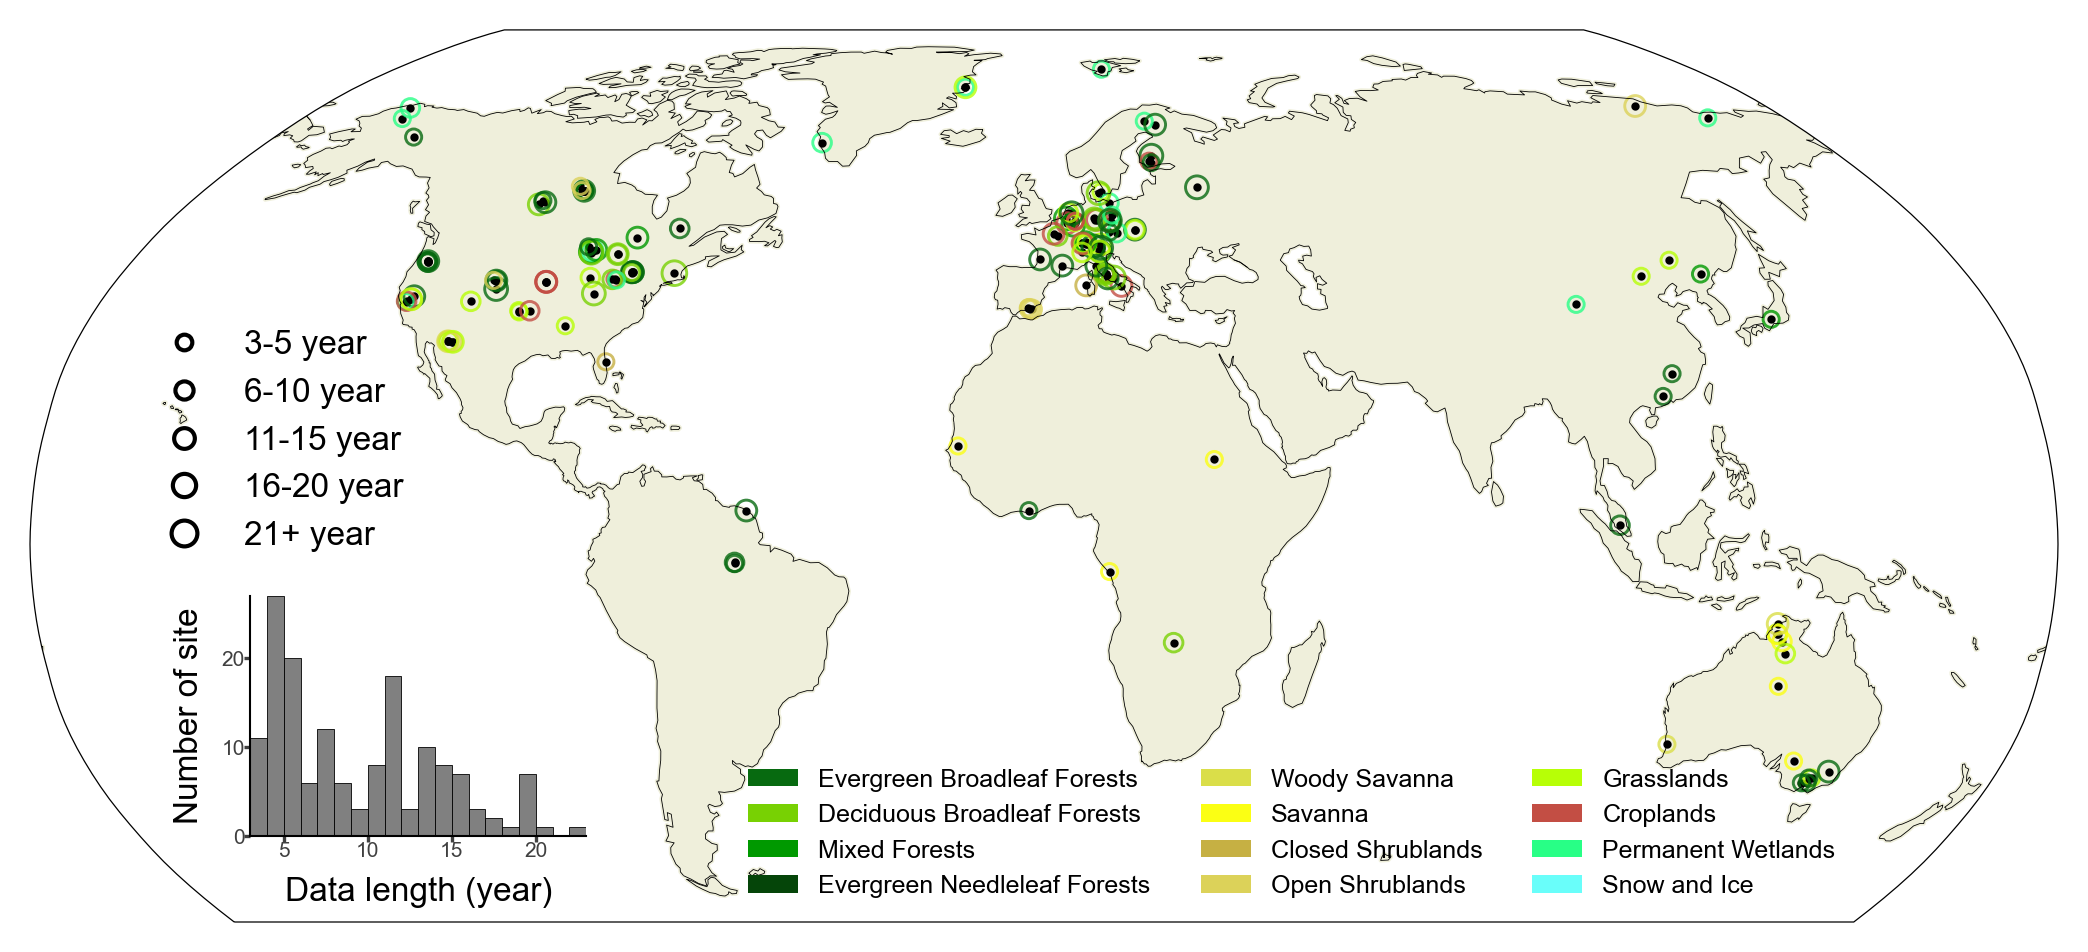

In [15]:
fig = plt.figure(figsize=(7,4), dpi=300)

plt.rcParams["font.sans-serif"] = "Arial"
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":8})
projection = ccrs.Robinson()

ax1 = fig.add_subplot(1, 1, 1,
                      projection=projection)

lon, lat, array = get_geotiff_data(r"D:\l2\Future global population exposure\Data_upload\Record-breaking probabilities\late-21st century and mid-21st century\PRCPTOT\PRCPTOT_lat_ssp245_median.tif")
draw(ax1, 'PRCPTOT', lon, lat, array, vmin=0, vmax=0.2, levels=np.arange(0, 0.24, 0.04), cmap=newcmap_pr, number="(a)")
df = pd.read_excel(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\Observed_data\site_info_inte.xlsx")
gdf = draw_vectors(ax1, df, projection)

ax111 = plt.axes([0.122, 0.2, 0.16, 0.2])
draw_hist(ax111, gdf.time_length, 20, (3, 23))

legend_elements = [Line2D([0], [0], marker='o', color='k', label='3-5 year',
                          markerfacecolor='none', markersize=3.75, linewidth=0),
                   Line2D([0], [0], marker='o', color='k', label='6-10 year',
                          markerfacecolor='none', markersize=4.36, linewidth=0),
                   Line2D([0], [0], marker='o', color='k', label='11-15 year',
                          markerfacecolor='none', markersize=4.97, linewidth=0),
                   Line2D([0], [0], marker='o', color='k', label='16-20 year',
                          markerfacecolor='none', markersize=5.58, linewidth=0),
                   Line2D([0], [0], marker='o', color='k', label='21+ year',
                          markerfacecolor='none', markersize=6.19, linewidth=0),
                   ]

# Create the figure
ax1.legend(handles=legend_elements, loc=[0.053, 0.4], frameon=False)

legend_elements = [Patch(facecolor='#076A10', edgecolor='none',
                         label='Evergreen Broadleaf Forests'),
                  Patch(facecolor='#78D103', edgecolor='none',
                         label='Deciduous Broadleaf Forests'),
                  Patch(facecolor='#009900', edgecolor='none',
                         label='Mixed Forests'),
                  Patch(facecolor='#054509', edgecolor='none',
                         label='Evergreen Needleleaf Forests'),
                  Patch(facecolor='#DADE49', edgecolor='none',
                         label='Woody Savanna'),
                  Patch(facecolor='#FBFF14', edgecolor='none',
                         label='Savanna'),
                  Patch(facecolor='#C6B043', edgecolor='none',
                         label='Closed Shrublands'),
                  Patch(facecolor='#DCD259', edgecolor='none',
                         label='Open Shrublands'),
                  Patch(facecolor='#B7FF06', edgecolor='none',
                         label='Grasslands'),
                  Patch(facecolor='#C34E44', edgecolor='none',
                         label='Croplands'),
                  Patch(facecolor='#28FF86', edgecolor='none',
                         label='Permanent Wetlands'),
                  Patch(facecolor='#69FEFA', edgecolor='none',
                         label='Snow and Ice')]

ax111.legend(handles=legend_elements, loc=[1.453, -0.3], ncol=3, frameon=False, fontsize=6)

plt.tight_layout()
plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\figs\fluxnet_sites.jpg", layout="tight", dpi=300)

In [ ]:
gdf.plot()